In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
import re
import string

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_fake = pd.read_csv(r"/content/drive/MyDrive/Fake.csv",error_bad_lines=False, engine="python")

<ipython-input-6-fb30fe0e8681>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_fake = pd.read_csv(r"/content/drive/MyDrive/Fake.csv",error_bad_lines=False, engine="python")


In [7]:
df_true = pd.read_csv(r"/content/drive/MyDrive/True.csv",error_bad_lines=False, engine="python")

<ipython-input-7-7a0284202351>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_true = pd.read_csv(r"/content/drive/MyDrive/True.csv",error_bad_lines=False, engine="python")


In [8]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [10]:
df_fake['class'] = 0
df_true['class'] = 1

In [11]:
df_fake.shape , df_true.shape

((23481, 5), (21417, 5))

In [12]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
  df_fake.drop([i],axis = 0,inplace = True)

df_true_manual_testing = df_true.tail(10)
for i in range(21417,23481,-1):
  df_true.drop([i],axis = 0,inplace = True)


In [13]:
df_fake.shape , df_true.shape

((23471, 5), (21417, 5))

In [14]:
df_fake_manual_testing['class'] = 0
df_true_manual_testing['class'] = 1

<ipython-input-14-e4e356cd77b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing['class'] = 0
<ipython-input-14-e4e356cd77b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing['class'] = 1


In [15]:
data_merge = pd.concat([df_fake, df_true] , axis =0)
data_merge.sample(10)


,title,text,subject,date,class
17561,Austrian election tests conservative star stea...,VIENNA (Reuters) - Austrians elect a new parli...,worldnews,"October 13, 2017",1
14490,SATANISTS ENDORSE A Candidate For President An...,"Nope, it s not Hillary Yes, Communist agitator...",politics,"Feb 13, 2016",0
5567,Canada foreign minister will oppose U.S. borde...,WASHINGTON (Reuters) - Canada opposes the idea...,politicsNews,"February 8, 2017",1
14623,Libyans swap jewelry for medical treatment as ...,TRIPOLI (Reuters) - In a square behind Libya s...,worldnews,"November 16, 2017",1
19085,"INDIAN-AMERICAN, Inventor Of Email Announces R...",Boston-based entrepreneur and inventor of Emai...,left-news,"Feb 25, 2017",0
6962,Biden Says He’s ‘Ready’ For A Woman President...,Vice President Joe Biden has been careful to g...,News,"April 11, 2016",0
17022,BREAKING: [Video] Obama’s State Dept Miraculou...,What a great time for Joe Biden to announce. H...,Government News,"Oct 20, 2015",0
10917,What will be in Obama's final budget proposal?,(Reuters) - President Barack Obama is set on T...,politicsNews,"February 9, 2016",1
6060,White House accuses media of playing down inau...,WASHINGTON (Reuters) - The White House on Satu...,politicsNews,"January 22, 2017",1
19789,BREAKING UNDERCOVER VIDEO: Democrat Operative…...,"Graphic, uncensored and disturbing is how Jam...",left-news,"Oct 17, 2016",0


In [16]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          768
Name: subject, dtype: int64


Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

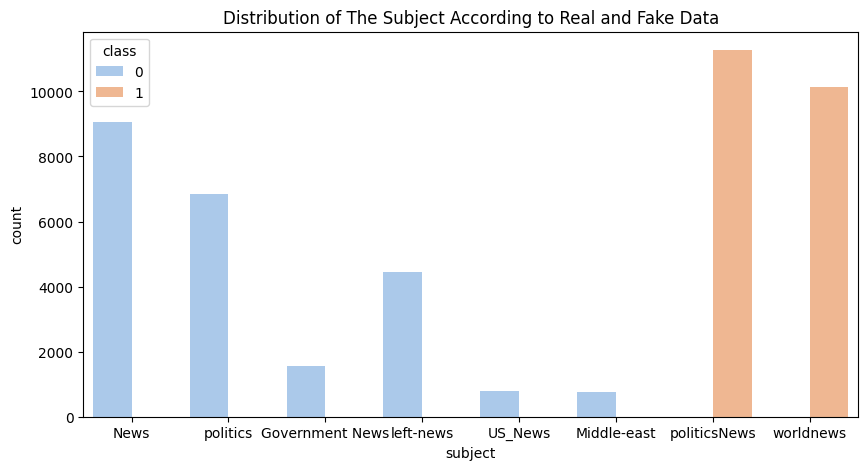

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

print(data_merge.subject.value_counts())
plt.figure(figsize=(10, 5))

ax = sns.countplot(x="subject",  hue='class', data=data_merge, palette="pastel")
plt.title("Distribution of The Subject According to Real and Fake Data")

In [18]:
data = data_merge.drop(['title','subject','date'],axis =1)

In [19]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [20]:
data = data.sample(frac = 1)

In [21]:
data.head()

,text,class
4430,WASHINGTON (Reuters) - The chairman of the Sen...,1
9046,Bill Cosby was America s favorite dad for a lo...,0
6662,It s a shame Barbara Boxer is leaving the Sena...,0
2209,Republicans seriously need to pay attention in...,0
10811,"RANCHO MIRAGE, Calif. (Reuters) - President Ba...",1


In [22]:
data.reset_index(inplace = True)
data.drop(['index'] , axis = 1, inplace = True)


In [23]:
data.columns

Index(['text', 'class'], dtype='object')

In [24]:
data.head()

,text,class
0,WASHINGTON (Reuters) - The chairman of the Sen...,1
1,Bill Cosby was America s favorite dad for a lo...,0
2,It s a shame Barbara Boxer is leaving the Sena...,0
3,Republicans seriously need to pay attention in...,0
4,"RANCHO MIRAGE, Calif. (Reuters) - President Ba...",1


In [25]:
def wordopt(text):
  text = text.lower()
  text = re.sub('\[.*?\]' , '' , text)
  text = re.sub("\\W" , " " , text)
  text = re.sub('https?://S+|www\.\S+','' , text)
  text = re.sub('<.*?>+' , '' ,text)
  text = re.sub('[%s]' % re.escape(string.punctuation) , '' ,text)
  text = re.sub('\n' , '' , text)
  text = re.sub('\w*\d\w*' , '' ,text)
  return text


In [26]:
data['text'] = data['text'].apply(wordopt)

In [27]:
x = data['text']
y = data['class']


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.25)

In [29]:
from numpy.lib.function_base import vectorize
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xv_train,y_train)

LogisticRegression()

In [31]:
pred_lr = lr.predict(xv_test)

In [32]:
lr.score(xv_test,y_test)

0.9857422919265728

In [33]:
lr_acc =  lr.score(xv_test,y_test)*100
print(lr_acc)

98.57422919265728


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_lr))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5899
           1       0.98      0.99      0.99      5323

    accuracy                           0.99     11222
   macro avg       0.99      0.99      0.99     11222
weighted avg       0.99      0.99      0.99     11222



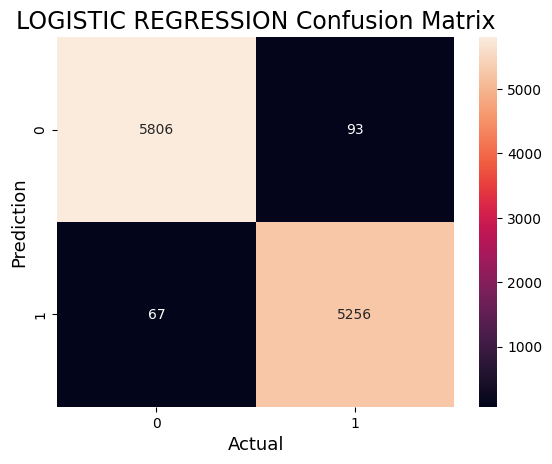

In [35]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score




clf = LogisticRegression(random_state=23)
clf.fit(xv_train,y_train)


y_pred = clf.predict(xv_test)


cm = confusion_matrix(y_test,y_pred)


sns.heatmap(cm,
			annot=True,
			fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('LOGISTIC REGRESSION Confusion Matrix',fontsize=17)
plt.show()



In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(xv_train,y_train)


DecisionTreeClassifier()

In [37]:
pred_dt = dt.predict(xv_test)

In [38]:
dt.score(xv_test,y_test)

0.9960791302798075

In [39]:
dt_acc = dt.score(xv_test,y_test)*100
print(dt_acc)

99.60791302798076


In [40]:
print(classification_report(y_test,pred_dt))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5899
           1       1.00      0.99      1.00      5323

    accuracy                           1.00     11222
   macro avg       1.00      1.00      1.00     11222
weighted avg       1.00      1.00      1.00     11222



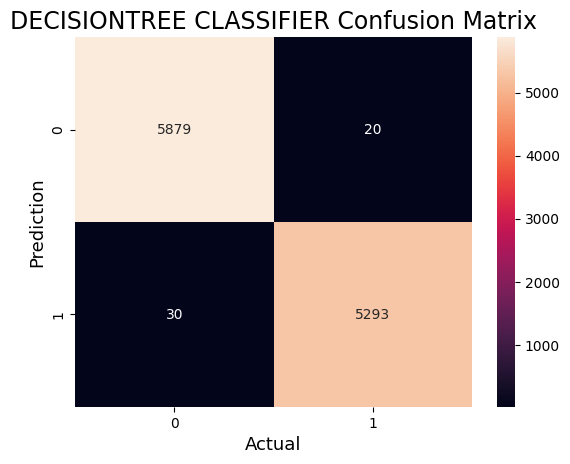

Accuracy : 0.9960791302798075


In [41]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



clf = DecisionTreeClassifier(random_state=23)
clf.fit(xv_train,y_train)


y_pred = clf.predict(xv_test)


cm = confusion_matrix(y_test,y_pred)


sns.heatmap(cm,
			annot=True,
			fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('DECISIONTREE CLASSIFIER Confusion Matrix',fontsize=17)
plt.show()



accuracy = accuracy_score(y_test,pred_dt)
print("Accuracy :", accuracy)


In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 0 )
rf.fit(xv_train , y_train)

RandomForestClassifier(random_state=0)

In [43]:
pred_rf = rf.predict(xv_test)

In [44]:
rf.score(xv_test,y_test)

0.9878809481375869

In [45]:
rf_acc = rf.score(xv_test,y_test)*100
print(rf_acc)

98.78809481375869


In [46]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5899
           1       0.99      0.99      0.99      5323

    accuracy                           0.99     11222
   macro avg       0.99      0.99      0.99     11222
weighted avg       0.99      0.99      0.99     11222



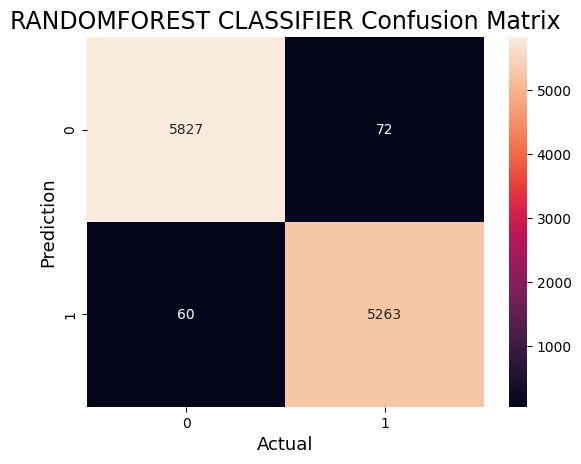

In [47]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score




clf = RandomForestClassifier(random_state=23)
clf.fit(xv_train,y_train)


y_pred = clf.predict(xv_test)

cm = confusion_matrix(y_test,y_pred)


sns.heatmap(cm,
			annot=True,
			fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('RANDOMFOREST CLASSIFIER Confusion Matrix',fontsize=17)
plt.show()



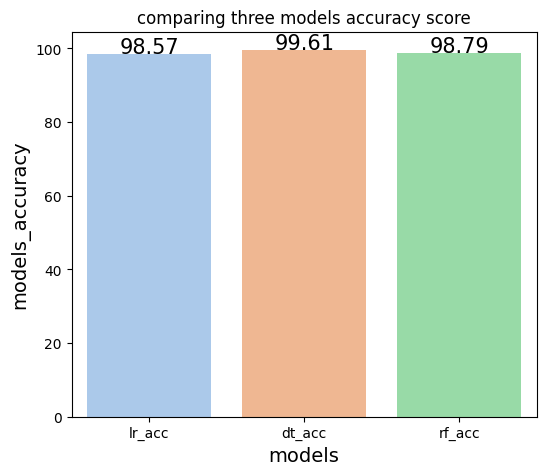

In [48]:
data =  {'model' : ['lr_acc','dt_acc','rf_acc'],'accuracy' :[lr_acc,dt_acc,rf_acc]}
df = pd.DataFrame(data, columns=['model', 'accuracy'])
plt.figure(figsize=(6, 5))
plots = sns.barplot(x="model", y="accuracy", data=df,palette="pastel")
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
				(bar.get_x() + bar.get_width() / 2,
					bar.get_height()), ha='center', va='center',
				size=15, xytext=(0, 5),
				textcoords='offset points')
plt.xlabel("models", size=14)
plt.ylabel("models_accuracy", size=14)
plt.title("comparing three models accuracy score")
plt.show()

In [49]:
def output_lable(n) :
  if n ==0:
    return 'Fake News'
  elif n == 1 :
    return 'Not a Fake News'

def manual_testing(news):
  testing_news = {"text" : [news]}
  new_def_test = pd.DataFrame(testing_news)
  new_def_test['text'] = new_def_test['text'].apply(wordopt)
  new_x_test = new_def_test['text']
  new_xv_test = vectorization.transform(new_x_test)
  pred_lr = lr.predict(new_xv_test)
  pred_dt = dt.predict(new_xv_test)
  pred_rf = rf.predict(new_xv_test)

  return print("\n\nlr Prediction : {} \ndt Prediction : {} \nrc Prediction : {}" . format(output_lable(pred_lr[0]),
                                                                                           output_lable(pred_dt[0]),
                                                                                           output_lable(pred_rf[0])))


In [55]:
news = str(input())
manual_testing(news)

JAKARTA (Reuters) - Indonesia will buy 11 Sukhoi fighter jets worth $1.14 billion from Russia in exchange for cash and Indonesian commodities, two cabinet ministers said on Tuesday. The Southeast Asian country has pledged to ship up to $570 million worth of commodities in addition to cash to pay for the Suhkoi SU-35 fighter jets, which are expected to be delivered in stages starting in two years. Indonesian Trade Minister Enggartiasto Lukita said in a joint statement with Defence Minister Ryamizard Ryacudu that details of the type and volume of commodities were  still being negotiated . Previously he had said the exports could include palm oil, tea, and coffee. The deal is expected to be finalised soon between Indonesian state trading company PT Perusahaan Perdangangan Indonesia and Russian state conglomerate Rostec. Russia is currently facing a new round of U.S.-imposed trade sanctions. Meanwhile, Southeast Asia s largest economy is trying to promote its palm oil products amid threats